# Intro To Machine Learning Workshop 4
## By IEEE AUS in collaboration with GDSC AUS

-------------------------------------------------------

## Loading in your own dataset

First, mount your google drive from the left menu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("/content/drive/MyDrive/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
### Loading images from a file:
'''
Assumes all data is stored in files where the files are the different classes.
Eg:
Data
|--- Dogs
     |--- pic1
     |--- pic2
     |--- pic3 etc etc
|--- Cats
|--- Birds

'''

import cv2 #OpenCV library
import os #Helps us list all files
location = r'/content/drive/MyDrive/<YOUR DATA LOCATION>/'

imgs=[] #pics stored here
labels=[] #Corresponding classes stored here

for folder in os.listdir(location):
    for img in os.listdir(location+folder+'/'):
        pic=cv2.imread(location+folder+'/'+img)
        resizedpic=cv2.resize(pic,(150,150)) #Resize to whatever you like
        imgs.append(resizedpic) #The picture
        labels.append(folder) #The class


## Explore your data

In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


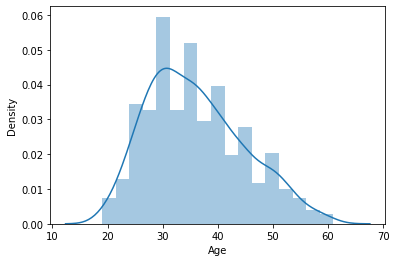

In [6]:
sns.distplot(data['Age'])

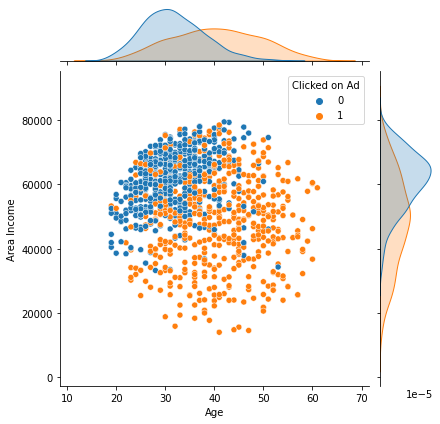

In [7]:
sns.jointplot(x='Age',y='Area Income', data=data, hue='Clicked on Ad')

In [8]:
data['Clicked on Ad'].value_counts()
#Balanced dataset! Wow!

1    500
0    500
Name: Clicked on Ad, dtype: int64

## Feature Selection

Columns we cant/dont know how to process

In [9]:
data.drop("Ad Topic Line",axis=1,inplace=True)
data.drop('City',axis=1,inplace=True)
data.drop('Country',axis=1,inplace=True) #Couldve made them into numbers 1,2,3, etc. Dropped here for simplicity
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


Based on correlations:

In [10]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


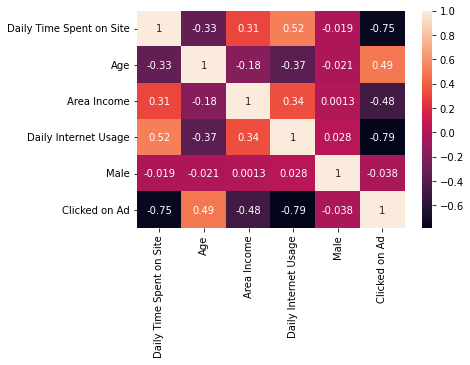

In [11]:
sns.heatmap(data.corr(),annot=True)

Since no two columns that are not the target are highly correlated with each other, we probably wont drop anything.

Drop columns if they are highly correlated, cause having them both provides no new data to the model and just adds more time and possibly confusion.

## Feature Engineering


Lets make Timestamp into number of seconds since midnight (ignoring the date)

In [19]:
def findSec(x): #Code such that x is one value in that column
    # Eg value of x: 2016-03-27 00:53:11
    hrs= int(x[11:13])
    mins=int(x[14:16])
    secs=int(x[17:])
    return hrs*3600+mins*60+secs

In [20]:
data['Secs From Midnight'] = data['Timestamp'].apply(findSec)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Secs From Midnight
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3191
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,5942
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,74142
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,9079
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,12978


In [21]:
data.drop('Timestamp',axis=1,inplace=True)

In [22]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Secs From Midnight
0,68.95,35,61833.90,256.09,0,0,3191
1,80.23,31,68441.85,193.77,1,0,5942
2,69.47,26,59785.94,236.50,0,0,74142
3,74.15,29,54806.18,245.89,1,0,9079
4,68.37,35,73889.99,225.58,0,0,12978


## ALL DONE! Now you're ready to do Machine Learning!

### Sample code below of how you would proceed from here. Not covered in this workshop since its similar to the last 2 workshops

In [23]:
x=data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Secs From Midnight' ]]
y=data['Clicked on Ad']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()

In [28]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
preds=model.predict(xtest)

In [30]:
print(model.score(xtest,ytest))

0.925


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [32]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        97
           1       0.94      0.91      0.93       103

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [33]:
print(confusion_matrix(ytest,preds))

[[91  6]
 [ 9 94]]


In [34]:
print(roc_auc_score(ytest,preds))

0.9253828445601041


## Thats great! But does normalizing your data help? Lets find out...


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.2)

In [39]:
model=LogisticRegression()

In [40]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
preds=model.predict(xtest)

In [42]:
print(model.score(xtest,ytest))

0.98


In [43]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        92
           1       1.00      0.96      0.98       108

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [44]:
print(confusion_matrix(ytest,preds))

[[ 92   0]
 [  4 104]]


In [45]:
print(roc_auc_score(ytest,preds))

0.9814814814814814


# Standardizing does help! 98% accuracy and only 4 misclassifications out of 200 instances! Amazing!